In [25]:
import numpy as np
import scipy.integrate as integrate
from scipy.optimize import fsolve
import sympy as sym
sym.init_printing()
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d



In [8]:
%%javascript
MathJax.Hub.Config({
    TeX: { equationNumbers: { autoNumber: "AMS" } }
});

<IPython.core.display.Javascript object>

# $$\text{Quiz 6}$$

$\text{Exercise 1}$

Write a Python code to compute and display the integrals bellow using the Python function $quad$
$$A = \int_{0}^{2} \dfrac{x^3+5x-20}{x^2+3}dx$$

$$B = \int_{3}^{5} \bigg(x-\frac{1}{3}\bigg)\sqrt{x^4-3}dx$$


In [9]:
f1=lambda x: (x**3+5*x-20)/(x**2+3)
f2=lambda x:(x-1/3)*((x**4-3)**(0.5))

A=integrate.quad(f1,0,2)[0]
B=integrate.quad(f2,3,5)[0]
print(A,',',B)


-7.049316535735796 , 124.40877284192784


$\text{Exercise 2}$

1. Write code to solve the following system of ordinary differential equations using the Python function odeint.

$$
\begin{cases}
\dfrac{dx_1}{dt}& = & -\dfrac{1}{2}x_1\\\\
\dfrac{dx_2}{dt}& = & \dfrac{1}{2}x_1-\dfrac{1}{4}x_2\\\\
\dfrac{dx_3}{dt}& = & \dfrac{1}{4}x_2-\dfrac{1}{6}x_3
\end{cases}, \text{ on } [0,4]
$$

Subject to the initial conditions $x_1(0) = 1, x_2(0) = 1, x_3(0) = 1$.

In [10]:
def MyfUnction(z,t):
    x1,x2,x3=z
    dx1dt=-0.5*x1
    dx2dt=0.5*x1-(1/4)*x2
    dx3dt=(1/4)*x2-(1/6)*x3
    return np.array([dx1dt,dx2dt,dx3dt])

z0=[1,1,1]
a=0
b=4
N=200
t=np.linspace(a,b,N)
q=odeint(MyfUnction,z0,t)


2. The exact solution of the above system of ODEs is given by

$$
\begin{cases}
x_1(t)& = & e^{-t/2}\\
x_2(t)& = & -2e^{-t/2}+3e^{-t/4}\\
x_3(t)& = & \dfrac{3}{2}e^{-t/2} - 9e^{-t/4} + \dfrac{17}{2}e^{-t/6}
\end{cases}
$$

Use $Subplot$ to plot side by side

- each exact and approximate solution in the same window
- and their absolute error vs the time 


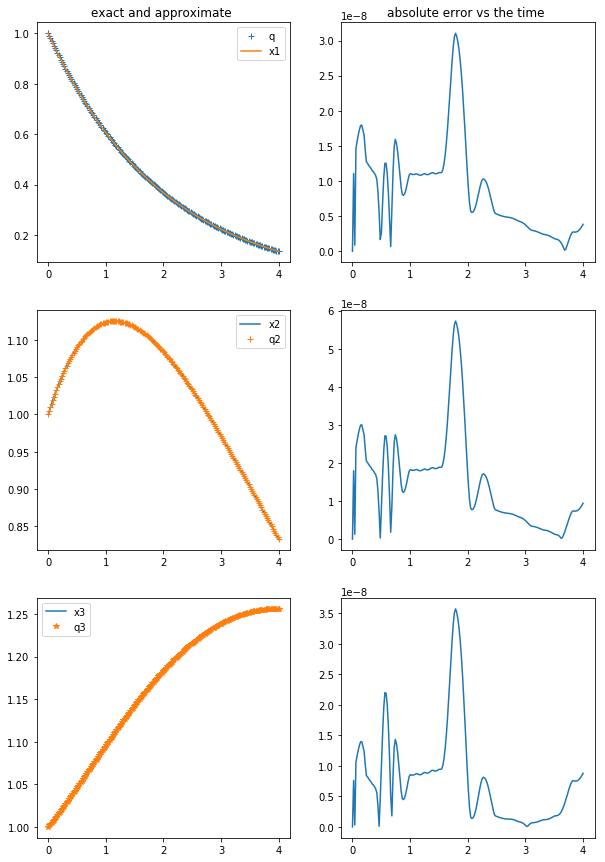

In [11]:
f3=lambda t: np.exp(-t/2)
f4=lambda t:-2*np.exp(-t/2)+3*np.exp(-t/4)
f5=lambda t:(3/2)*np.exp(-t/2)-9*np.exp(-t/4)+(17/2)*np.exp(-t/6)
x1=f3(t)
x2=f4(t)
x3=f5(t)
e1=abs(x1-q[:,0])
e2=abs(x2-q[:,1])
e3=abs(x3-q[:,2])

plt.figure(figsize=(10,15))
plt.subplot(3,2,1)
plt.plot(t,q[:,0],'+')
plt.plot(t,x1)
plt.title('exact and approximate ')
plt.legend(['q','x1'])
plt.subplot(3,2,2)
plt.plot(t,e1)
plt.title('absolute error vs the time ')

plt.subplot(3,2,3)
plt.plot(t,x2)
plt.plot(t,q[:,1],'+')
plt.legend(['x2','q2'])
plt.subplot(3,2,4)
plt.plot(t,e2)


plt.subplot(3,2,5)
plt.plot(t,x3)
plt.plot(t,q[:,2],'*')
plt.legend(['x3','q3'])
plt.subplot(3,2,6)
plt.plot(t,e3)

$\text{Exercise 3} $ (Write our own function and compare it with $odeint$)

Let $\{ t_k\}$ be a partition of $[a,b]$ such that $a=t_1<t_2<\cdots<t_{N}=b$ and $H$ be the constant length of the $k$-th subinterval ($H = t_k - t_{k-1}$). Let us consider initial value problem

\begin{equation}\label{eul2}
  \begin{cases}
    \dfrac{dz}{dt} = f(z,t),      & \quad \text{on } [a, b]\\\\
    z(a) = c,
  \end{cases}
\end{equation}
where $z,f,c\in R^M$ i.e. $z = [x_1, x_2,\cdots, x_{M}]$, $c = [x_1(a), x_2(a),\cdots, x_{M}(a)]$ and $f = [f_1, f_2,\cdots, f_{M}]$. Note that /\eqref{eul2} is a the general form of system of ODEs. 

Let $t, z_k,Z$ defined as follows $$t=[t_1,t_2,\cdots,t_{N-1},t_{N}],\quad z_k = [x_1(t_k), x_2(t_k),\cdots, x_{M}(t_k)], \quad
Z =\begin{pmatrix}
x_1(t_1)& x_2(t_1)&\cdots& x_{M}(t_1)\\
x_1(t_2)& x_2(t_2)&\cdots& x_{M}(t_2)\\
\vdots& \vdots&\ddots& \vdots\\
x_1(t_{N})& x_2(t_{N})&\cdots& x_{M}(t_{N})
\end{pmatrix}
$$

1. Write a python function <b> EulerOdeSys </b> that takes $f,c,t$ and return the solution $Z$ of the initial value problem \eqref{eul2} using Euler method i.e.
$$ z_{k+1} = z_k + Hf(z_k,t_k) $$


In [34]:
def EulerOdeSys (f,c,t):
    H=t[1]-t[0]
    N=len(t)
    M=len(c)
    z=np.zeros((N,M))
    z0[0]=c
    for k in range(0,N-1):
        z[k+1]=z[k]+H*f(z[k],t[k])
    return z


2. Write a python function <b> RK4OdeSys </b> that takes $f,c,t$ and return the solution $Z$ of the initial value problem (1) using the fourth order Runge-Kutta method i.e.

\begin{equation}
\begin{cases}
k_1 = f(z_k,t_k),\\\\
k_2 = f(z_k+H\dfrac{k_1}{2}, t_k + \dfrac{H}{2}),\\\\
k_3 = f(z_k+H\dfrac{k_2}{2}, t_k + \dfrac{H}{2}),\\\\
k_4 = f(z_k+Hk_3, t_k + H),\\\\
z_{k+1} = z_k + \dfrac{H}{6}(k_1+2k_2+2k_3+k_4)
\end{cases}
\end{equation}



In [44]:
def  RK4OdeSys(f,c,t):
    H=t[1]-t[0]
    N=len(t)
    M=len(c)
    z=np.zeros((N,M))
    z[0]=c
    for k in range(0,N-1):
        k1=f(z[k],t[k])
        k2=f(z[k]+H*(k1/2),t[k]+H/2)
        k3=f(z[k]+H*(k2/2),t[k]+H/2)
        k4=f(z[k]+H*(k3),t[k]+H)
        z[k+1]=z[k]+(H/6)*(k1+2*k2+2*k3+k4)
    return z
a=0
b=4
N=200
t=np.linspace(a,b,N)


3. Solve the system of ODEs in $Exercise2$ using your function <b> EulerOdeSys </b> and <b> RK4OdeSys </b> 

In [45]:

a=0
b=4
N=200
t=np.linspace(a,b,N)

c=[0,1,3]
e=RK4OdeSys(MyfUnction,c,t)
p=EulerOdeSys(MyfUnction,z0,t)


4. By plotting the absolute error in the approximate and exact solutions, tell us which function gives a more accurate solution of a system of ODEs.

In [46]:
plt.figure(figsize=(10,15))
x1,e[:,0],q[:,0],p[:,0]
# plt.subplot(3,2,1)
# plt.plot(t,abs(x1-e[:,0]))
# plt.plot(t[::5],abs(x1-(p[:,0])[::5],'+')
# # plt.plot(t,abs(x1-q[:,0]))

# # plt.subplot(3,2,2)
# plt.plot(t,abs(x2-e[:,1]))
# plt.plot(t,abs(x2-p[:,1]),'+')
# plt.plot(t,abs(x2-q[:,1]),'+')


# plt.subplot(3,2,3)
# plt.plot(t,abs(x3-e[:,2]))
# plt.plot(t,abs(x3-p[:,2]),'+')
# plt.plot(t,abs(x3-q[:,2]),'+')


(array([1.        , 0.99000008, 0.98010017, 0.97029925, 0.96059634,
        0.95099045, 0.94148063, 0.9320659 , 0.92274532, 0.91351794,
        0.90438284, 0.89533909, 0.88638577, 0.87752199, 0.86874684,
        0.86005945, 0.85145892, 0.84294441, 0.83451503, 0.82616995,
        0.81790832, 0.80972931, 0.80163208, 0.79361583, 0.78567974,
        0.777823  , 0.77004484, 0.76234446, 0.75472107, 0.74717393,
        0.73970225, 0.73230529, 0.7249823 , 0.71773254, 0.71055527,
        0.70344978, 0.69641534, 0.68945124, 0.68255679, 0.67573128,
        0.66897402, 0.66228434, 0.65566155, 0.64910499, 0.64261399,
        0.63618791, 0.62982608, 0.62352787, 0.61729265, 0.61111977,
        0.60500863, 0.59895859, 0.59296905, 0.58703941, 0.58116907,
        0.57535743, 0.5696039 , 0.56390791, 0.55826888, 0.55268624,
        0.54715942, 0.54168787, 0.53627104, 0.53090837, 0.52559933,
        0.52034338, 0.51513999, 0.50998864, 0.50488879, 0.49983995,
        0.49484159, 0.48989322, 0.48499432, 0.48

<Figure size 720x1080 with 0 Axes>